<a href="https://colab.research.google.com/github/Andrade-Douglas/Data-Science/blob/master/consumidor_gov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reclamações de Consumidores**
url: https://www.consumidor.gov.br

data: Página inicial >> Indicadores >> Dados Abertos >> Dados - 2º Semestre/2018

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd

In [3]:
file = r'/gdrive/My Drive/Colab Notebooks/Datasets/consumidor_gov_2_semestre.csv'
missing_values = ['N/A', 'NA', 'NAN', 'n/a', 'na', 'nan', '--', '.', '']

data_base = pd.read_csv(file, encoding='latin-1', error_bad_lines=False, sep=';', na_values= missing_values)
data_base.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Jaú,F,entre 41 a 50 anos,23/07/2018,1.0,Magazineluiza.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Fogão, microondas, forno elétrico, depurador d...",Contrato / Oferta,Recusa em cancelar compra/serviço no prazo de ...,Internet,N,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 31 a 40 anos,20/07/2018,1.0,Multiplus,Programas de Fidelidade,Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
2,SE,SP,Jundiaí,M,entre 21 a 30 anos,28/07/2018,7.0,Claro Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
3,NE,BA,Eunápolis,M,entre 31 a 40 anos,27/07/2018,8.0,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,5.0,1
4,NE,BA,Salvador,M,entre 31 a 40 anos,27/07/2018,8.0,Caixa Econômica Federal,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Negativação indevida - desconhece motivo e/ou ...,Telefone,N,S,Finalizada avaliada,Resolvida,5.0,1


In [5]:
# número de linha, coluna
data_base.shape

(306965, 20)

In [6]:
# informações a respeito do DataFrame
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306965 entries, 0 to 306964
Data columns (total 20 columns):
Região                    306965 non-null object
UF                        306965 non-null object
Cidade                    306965 non-null object
Sexo                      306965 non-null object
Faixa Etária              306965 non-null object
Data Finalização          306965 non-null object
Tempo Resposta            305327 non-null float64
Nome Fantasia             306965 non-null object
Segmento de Mercado       306965 non-null object
Área                      306965 non-null object
Assunto                   306965 non-null object
Grupo Problema            306965 non-null object
Problema                  306965 non-null object
Como Comprou Contratou    306965 non-null object
Procurou Empresa          306965 non-null object
Respondida                306965 non-null object
Situação                  306965 non-null object
Avaliação Reclamação      306965 non-null object
Nota d

In [8]:
# renomear colunas
data_base.columns=data_base.columns.str.lower().str.replace(' ', '_').str.replace('ã', 'a').str.replace('á', 'a').str.replace('ç', 'c')
data_base.head(n = 3)

,regiao,uf,cidade,sexo,faixa_etaria,data_finalizacao,tempo_resposta,nome_fantasia,segmento_de_mercado,area,assunto,grupo_problema,problema,como_comprou_contratou,procurou_empresa,respondida,situacao,avaliacao_reclamacao,nota_do_consumidor,total
0,SE,SP,Jaú,F,entre 41 a 50 anos,23/07/2018,1.0,Magazineluiza.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Fogão, microondas, forno elétrico, depurador d...",Contrato / Oferta,Recusa em cancelar compra/serviço no prazo de ...,Internet,N,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 31 a 40 anos,20/07/2018,1.0,Multiplus,Programas de Fidelidade,Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
2,SE,SP,Jundiaí,M,entre 21 a 30 anos,28/07/2018,7.0,Claro Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1


In [9]:
# pesquisar por células vazias
data_base.isnull().values.any()

True

In [11]:
# quantidade de células vazias
data_base.isnull().sum().sum()

125739

In [13]:
# onde estão as células vazias
data_base.isnull().sum()

regiao                         0
uf                             0
cidade                         0
sexo                           0
faixa_etaria                   0
data_finalizacao               0
tempo_resposta              1638
nome_fantasia                  0
segmento_de_mercado            0
area                           0
assunto                        0
grupo_problema                 0
problema                       0
como_comprou_contratou         0
procurou_empresa               0
respondida                     0
situacao                       0
avaliacao_reclamacao           0
nota_do_consumidor        124101
total                          0
dtype: int64

In [15]:
  celulas_vazias = data_base[data_base.tempo_resposta.isnull()]
  celulas_vazias.head(n= 3)

,regiao,uf,cidade,sexo,faixa_etaria,data_finalizacao,tempo_resposta,nome_fantasia,segmento_de_mercado,area,assunto,grupo_problema,problema,como_comprou_contratou,procurou_empresa,respondida,situacao,avaliacao_reclamacao,nota_do_consumidor,total
10,SE,ES,Serra,M,entre 41 a 50 anos,30/07/2018,NaN,Panini,Editoras,Demais Produtos,"Livros e papelaria (material didático, jornais...",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,N,Finalizada avaliada,Resolvida,5.0,1
100,NE,PE,Santa Maria da Boa Vista,M,entre 41 a 50 anos,26/07/2018,NaN,Philips Áudio e Vídeo,"Fabricantes - Eletroeletrônicos, Produtos de ...",Produtos Eletrodomésticos e Eletrônicos,"Aparelho de som, video e imagem ( Câmera, film...",Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.0,1
247,NE,CE,Maracanaú,M,até 20 anos,15/07/2018,NaN,Boa Vista Serviços - SCPC (Serviço Central de ...,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,N,Finalizada avaliada,Não Resolvida,1.0,1


**Número de reclamações por estado**

In [23]:
data_base[u'uf'].value_counts().reset_index()

,index,uf
0,SP,92461
1,RJ,31015
2,PR,26462
3,MG,24718
4,RS,23594
5,BA,15244
6,DF,12801
7,SC,10449
8,GO,9617
9,CE,8652


In [0]:
import seaborn as sns

sns.set(style = 'darkgrid')

**Número de reclamação por gênero**

In [26]:
data_base[u'sexo'].value_counts().reset_index()

,index,sexo
0,M,178049
1,F,128916


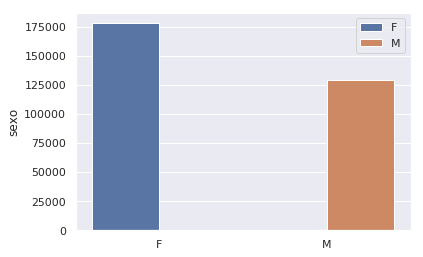

In [40]:
sexo = data_base[u'sexo'].unique()
cont = data_base[u'sexo'].value_counts()
sns.barplot(x= sexo, y= cont, hue= sexo)

**Faixa etária de consumidores por sexo**

In [44]:
data_base.groupby('sexo')[u'faixa_etaria'].value_counts()

sexo  faixa_etaria      
F     entre 31 a 40 anos    38802
      entre 21 a 30 anos    37627
      entre 41 a 50 anos    20163
      entre 51 a 60 anos    14972
      entre 61 a 70 anos     9831
      mais de 70 anos        4165
      até 20 anos            3356
M     entre 31 a 40 anos    61486
      entre 21 a 30 anos    58250
      entre 41 a 50 anos    26638
      entre 51 a 60 anos    14796
      entre 61 a 70 anos     8854
      até 20 anos            4452
      mais de 70 anos        3573
Name: faixa_etaria, dtype: int64

**Consumidores mais jovens que contratam os serviços pela internet**

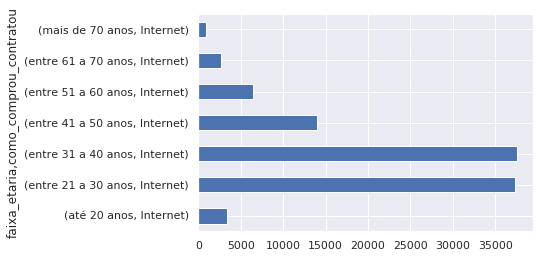

In [48]:
comprou_internet = data_base[data_base['como_comprou_contratou'] == 'Internet']
comprou_internet.groupby(u'faixa_etaria')['como_comprou_contratou'].value_counts().plot.barh()

**Estes consumidores procuram a empresa antes de registrar uma reclamação?**

Clientes entre as faixas etárias 21 a 30 anos que procuraram ou não, a empresa antes de representarem as reclamações junto ao site

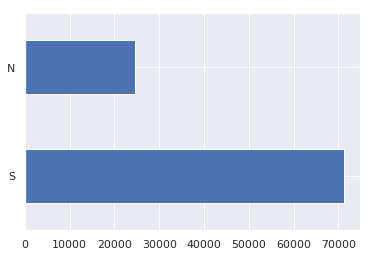

In [64]:
procura_empresa = data_base[data_base[u'faixa_etaria']=='entre 21 a 30 anos']
procura_empresa['procurou_empresa'].value_counts().plot.barh()

In [65]:
data_base[data_base[u'faixa_etaria'] == u'entre 21 a 30 anos'][u'procurou_empresa'].value_counts().reset_index()

,index,procurou_empresa
0,S,71231
1,N,24646


In [55]:
data_base[u'procurou_empresa'].value_counts().reset_index()

,index,procurou_empresa
0,S,241734
1,N,65231


**Qual o grupo de problema mais comum**

In [57]:
data_base['grupo_problema'].value_counts().reset_index()

,index,grupo_problema
0,Cobrança / Contestação,132674
1,Contrato / Oferta,53750
2,Vício de Qualidade,43416
3,Atendimento / SAC,36971
4,Informação,26696
5,Entrega do Produto,11715
6,Saúde e Segurança,1743


In [60]:
data_base[data_base['grupo_problema'] == u'Cobrança / Contestação'][u'problema'].value_counts()

Cobrança indevida / abusiva para alterar ou cancelar o contrato                                           27425
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            24250
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                      12771
Cobrança de tarifas, taxas, valores não previstos / não informados                                        10154
Renegociação / parcelamento de dívida                                                                      8530
Cobrança após cancelamento do serviço                                                                      8050
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                          6552
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       6512
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                        

In [68]:
data_base['segmento_de_mercado'].unique()

array(['Comércio Eletrônico', 'Programas de Fidelidade',
       'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)',
       'Bancos, Financeiras e Administradoras de Cartão', 'Editoras',
       'Empresas de Intermediação de Serviços / Negócios',
       'Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática',
       'Transporte Aéreo', 'Bancos de Dados e Cadastros de Consumidores',
       'Empresas de Pagamento Eletrônico', 'Varejo',
       'Perfumaria, Cosméticos e Higiene Pessoal',
       'Energia Elétrica, Gás, Água e Esgoto',
       'Corretoras e Sociedades de Seguros, Capitalização e Previdência',
       'Operadoras de Planos de Saúde e Administradoras de Benefícios',
       'Agências de Viagens', 'Administradoras de Consórcios',
       'Supermercados', 'Farmácias', 'Empresas de Recuperação de Crédito',
       'Fabricantes - Linha Branca',
       'Fabricantes - Eletroportáteis e Artigos de Uso Doméstico e Pessoal',
       'Montadoras, Concessio

In [71]:
data_base[u'segmento_de_mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    127373
Bancos, Financeiras e Administradoras de Cartão                             71921
Bancos de Dados e Cadastros de Consumidores                                 24288
Comércio Eletrônico                                                         20922
Transporte Aéreo                                                            15804
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática        8223
Empresas de Intermediação de Serviços / Negócios                             7082
Energia Elétrica, Gás, Água e Esgoto                                         4388
Programas de Fidelidade                                                      3633
Varejo                                                                       3442
Corretoras e Sociedades de Seguros, Capitalização e Previdência              3118
Empresas de Pagamento Eletrônico                                             2868
Perfumaria, Cosm

**Segmentos de mercado com maior número de reclamações do tipo de problema 'Cobrança / Contestação'**

In [75]:
segmento = data_base[data_base[u'grupo_problema'] ==  u'Cobrança / Contestação']
segmento['segmento_de_mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    62166
Bancos, Financeiras e Administradoras de Cartão                            44968
Transporte Aéreo                                                            4450
Comércio Eletrônico                                                         3514
Empresas de Intermediação de Serviços / Negócios                            2778
Energia Elétrica, Gás, Água e Esgoto                                        2589
Empresas de Recuperação de Crédito                                          1879
Bancos de Dados e Cadastros de Consumidores                                 1738
Empresas de Pagamento Eletrônico                                            1474
Perfumaria, Cosméticos e Higiene Pessoal                                    1290
Corretoras e Sociedades de Seguros, Capitalização e Previdência             1116
Varejo                                                                      1032
Agências de Viagens         

In [79]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


**Rank das Top 20: Empresas com reclamações**

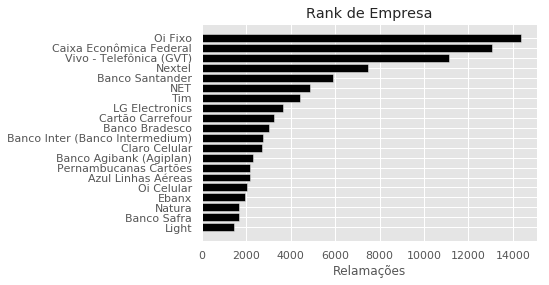

In [81]:
fig, ax = plt.subplots()

y_pos = np.arange(len(segmento['nome_fantasia'].value_counts()[:20]))
values = segmento['nome_fantasia'].value_counts()[:20]
segmentos = segmento['nome_fantasia'].unique()[:20]

ax.barh(y_pos, values, align = 'center', color = 'black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Relamações')
ax.set_title('Rank de Empresa')

plt.show()

**Tempo de resposta tem alguma correlação com a nota do consumidor?**

In [0]:
df = data_base.drop('total', axis = 1)

In [85]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,tempo_resposta,nota_do_consumidor
tempo_resposta,1,-0.0535395
nota_do_consumidor,-0.0535395,1


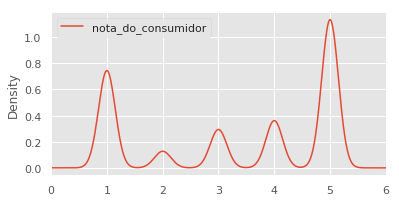

In [87]:
data_base.plot.density(y = 'nota_do_consumidor', xlim = [0,6], figsize = [6,3])

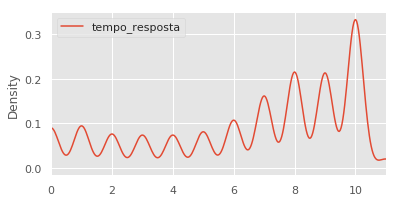

In [88]:
data_base.plot.density(y = 'tempo_resposta', xlim = [0,11], figsize = [6,3])

**Proporção de reclamações registradas e não respondidas**

In [92]:
segmento_de_mercado = data_base.groupby(u'segmento_de_mercado')[u'segmento_de_mercado'].count()
segmento_de_mercado = segmento_de_mercado[segmento_de_mercado > 20]
segmento_de_mercado

segmento_de_mercado
Administradoras de Consórcios                                                 557
Agências de Viagens                                                          2087
Artigos Esportivos                                                            187
Bancos de Dados e Cadastros de Consumidores                                 24288
Bancos, Financeiras e Administradoras de Cartão                             71921
Cartões de Descontos                                                           85
Comércio Eletrônico                                                         20922
Corretoras e Sociedades de Seguros, Capitalização e Previdência              3118
Editoras                                                                      465
Empresas de Intermediação de Serviços / Negócios                             7082
Empresas de Pagamento Eletrônico                                             2868
Empresas de Recuperação de Crédito                                           2

In [103]:
df2 = data_base[data_base[u'segmento_de_mercado'].isin(segmento_de_mercado.keys())]
df2 = df2[df2[u'avaliacao_reclamacao'] == u'Não Resolvida']
xl = df2.groupby(u'segmento_de_mercado')[u'segmento_de_mercado'].count()
xl

segmento_de_mercado
Administradoras de Consórcios                                                194
Agências de Viagens                                                          753
Artigos Esportivos                                                            38
Bancos de Dados e Cadastros de Consumidores                                 6082
Bancos, Financeiras e Administradoras de Cartão                            16235
Cartões de Descontos                                                          17
Comércio Eletrônico                                                         5322
Corretoras e Sociedades de Seguros, Capitalização e Previdência              874
Editoras                                                                     146
Empresas de Intermediação de Serviços / Negócios                            2000
Empresas de Pagamento Eletrônico                                             660
Empresas de Recuperação de Crédito                                           790
Energia 

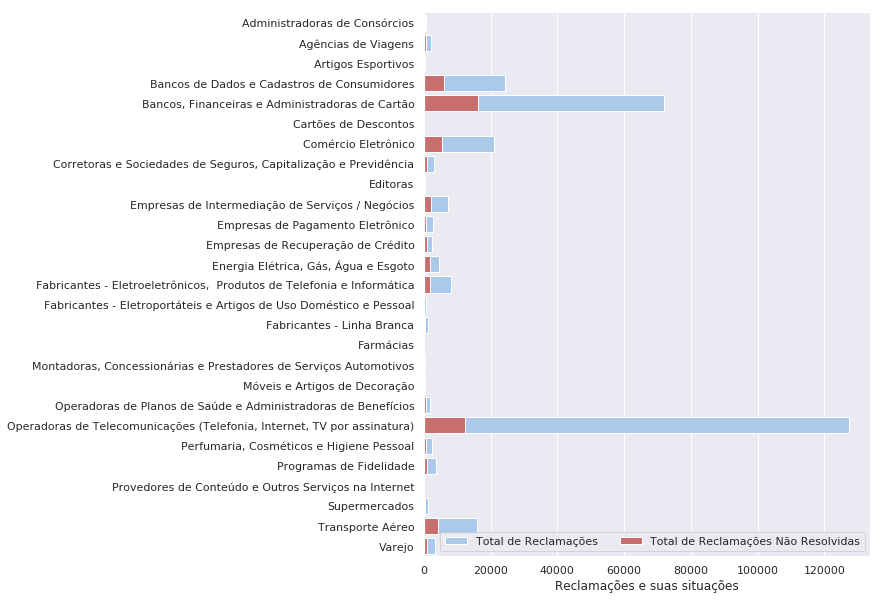

In [111]:
f, ax = plt.subplots(figsize = (8,10))

sns.set_color_codes('pastel')
sns.barplot(x = segmento_de_mercado.values, y = segmento_de_mercado.keys(), label = 'Total de Reclamações', color = 'b')

sns.set_color_codes('muted')
sns.barplot(x = xl.values, y = xl.keys(), label = 'Total de Reclamações Não Resolvidas', color = 'r')

ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = '', xlabel = 'Reclamações e suas situações')
sns.despine(left = False, bottom = True)